In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import time
import random
import os

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import (Dense, Flatten, Reshape, Input, concatenate,
                                      Conv2D, Conv2DTranspose, Activation,
                                      MaxPooling2D, BatchNormalization, UpSampling2D)
from tensorflow.keras.preprocessing import image
from tensorflow.keras import utils
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import LambdaCallback
from tensorflow.keras import backend as K
from tensorflow.keras.datasets import fashion_mnist

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [5]:
# Размерность массивов
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [6]:
# Функция вывода оригинальных изображений
def image_origin(X_train):
    n = 5
    plt.figure(figsize=(22,6))
    for i in range(n):
        index = np.random.randint(0, X_train.shape[0])
        ax=plt.subplot(1, n, i + 1)

        plt.imshow(X_train[index].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

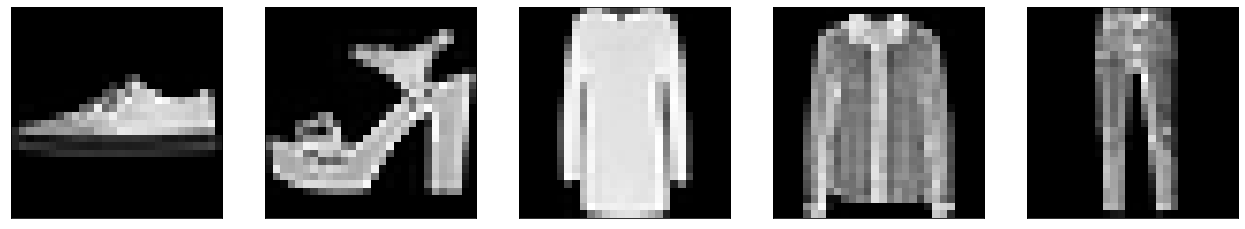

In [7]:
image_origin(X_train)

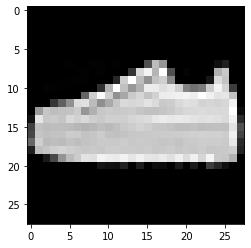

In [8]:
# Вывод  по 1 изображению
plt.figure(figsize=(8, 4))
plt.imshow(X_train[np.random.randint(0, X_train.shape[0])].reshape(28, 28), cmap='gray')
plt.show()

In [ ]:
'''# Создаем зашумление изображения черными квадратиками
squares_factor = 0.9
X_train_squares = X_train + squares_factor * np.random.normal(loc=0.9, scale=0.1, size=X_train.shape)
X_test_squares = X_test + squares_factor * np.random.normal(loc=0.9, scale=0.1, size=X_test.shape)
X_train_squares = np.clip(X_train_squares, 0., 1.)
X_test_squares = np.clip(X_train_squares, 0., 1.)'''

In [9]:
# Функция вывода испорченных  и предсказанных изображений
def squares_predict(X_test_squares):
    n = 5
    plt.figure(figsize=(22,6))
    for i in range(n):
        ax=plt.subplot(1, n, i+1)

        plt.imshow(X_train_squares[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

In [10]:
# Создаем зашумление изображения
noise_factor = 0.2
X_train_squares = X_train + noise_factor * np.random.normal(size=X_train.shape) 
X_test_squares = X_test + noise_factor * np.random.normal(size=X_test.shape)

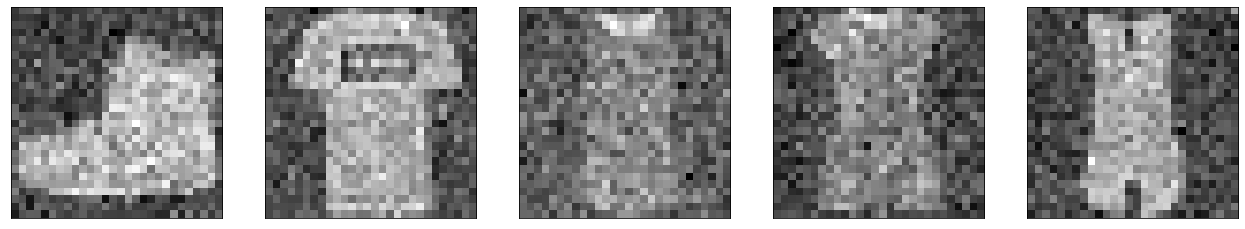

In [11]:
# Выводим испорченное изображение
squares_predict(X_train_squares)

In [ ]:
# Создаем модель автокодировщика
shape = (28, 28, 1)
input = Input((shape))   # Входные параметры

x = Conv2D(32, 3, activation='relu', padding='same')(input)
x = MaxPooling2D(2)(x)
x = Conv2D(64, 3, activation='relu', padding='same')(x)
x = MaxPooling2D(2)(x)
x = Flatten()(x)

z = Dense(256, activation='relu')(x)  # слой подвыборки

x = Dense(7*7*256, activation='relu')(z)  # изменяем размер картинки
x = Reshape((7, 7 , 256))(x)
x = Conv2DTranspose(64, 3, strides=2, activation='relu', padding='same')(x)
x = Conv2DTranspose(32, 3, strides=2, activation='relu', padding='same')(x)

# Финальный слой выдающий итоговое изображение
x = Conv2D(1, 3, activation='sigmoid', padding='same')(x)

In [ ]:
model = Model(input, x)
model.compile(optimizer=Adam(lr=0.0001), loss='mse')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               8030

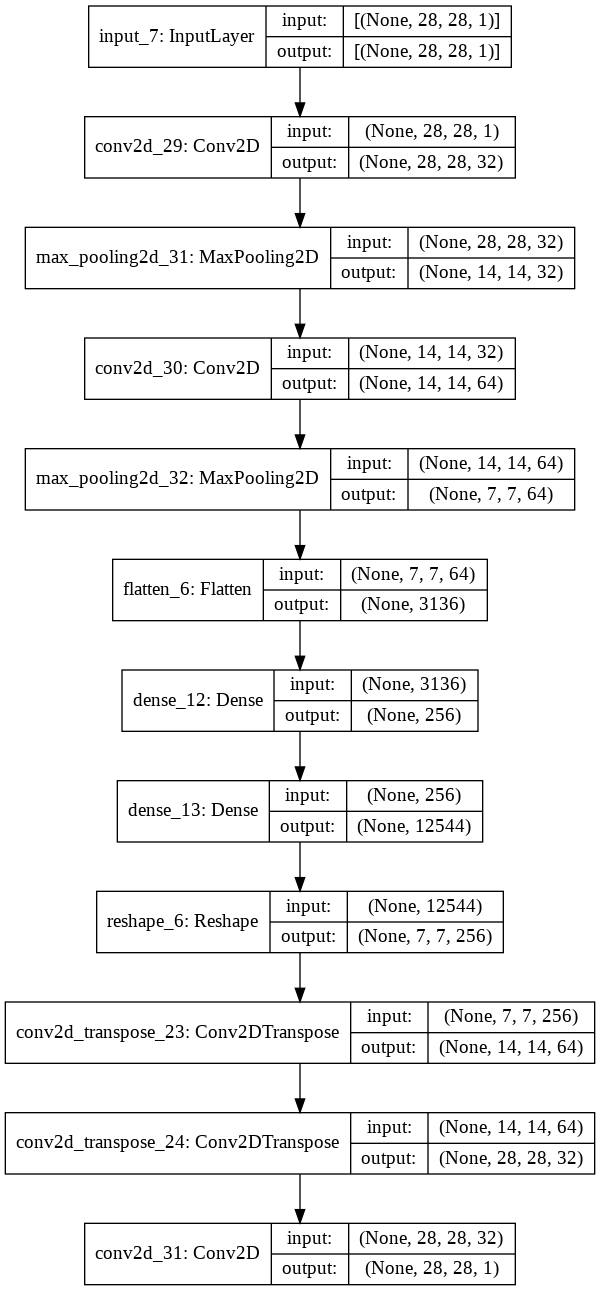

In [ ]:
plot_model(model, dpi=0, show_shapes=True)

In [ ]:
history = model.fit(X_train_squares, X_train, epochs=100, batch_size=256, validation_data=(X_train_squares, X_train))

Epoch 1/100
235/235 [==============================] - 40s 37ms/step - loss: 0.0782 - val_loss: 0.0315
Epoch 2/100
235/235 [==============================] - 8s 35ms/step - loss: 0.0257 - val_loss: 0.0222
Epoch 3/100
235/235 [==============================] - 8s 36ms/step - loss: 0.0203 - val_loss: 0.0190
Epoch 4/100
235/235 [==============================] - 9s 36ms/step - loss: 0.0181 - val_loss: 0.0176
Epoch 5/100
235/235 [==============================] - 9s 37ms/step - loss: 0.0168 - val_loss: 0.0163
Epoch 6/100
235/235 [==============================] - 9s 36ms/step - loss: 0.0158 - val_loss: 0.0153
Epoch 7/100
235/235 [==============================] - 8s 36ms/step - loss: 0.0150 - val_loss: 0.0147
Epoch 8/100
235/235 [==============================] - 8s 36ms/step - loss: 0.0143 - val_loss: 0.0140
Epoch 9/100
235/235 [==============================] - 8s 36ms/step - loss: 0.0137 - val_loss: 0.0136
Epoch 10/100
235/235 [==============================] - 8s 36ms/step - loss: 0.01

In [ ]:
# минимальная ошибка на обучающей и проверочной выборе
print(f'\nМинимальная ошибка на обучающей выборе: {min(history.history["loss"])} \
\nМинимальная ошибка на проверочной выборе: {min(history.history["val_loss"])}')


Минимальная ошибка на обучающей выборе: 0.006067552603781223 
Минимальная ошибка на проверочной выборе: 0.006025930866599083


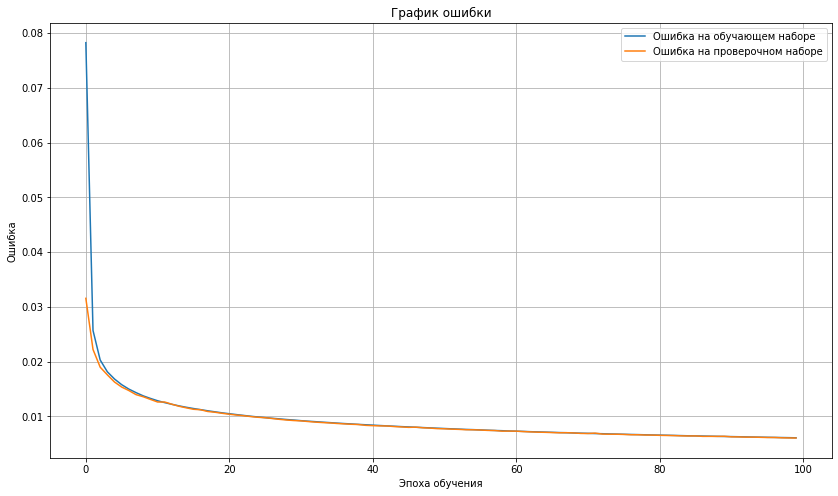

In [ ]:
# Выводим графики ошибки
plt.figure(figsize=(14, 8))
plt.plot(history.history['loss'], label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], label='Ошибка на проверочном наборе')
plt.title('График ошибки')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.grid()
plt.legend()
plt.show()

In [ ]:
model.save_weights('/content/drive/MyDrive/UAI/model_fashion.h5') # Сохраняем модель
model.load_weights('/content/drive/MyDrive/UAI/model_fashion.h5') # Загружаем модель

In [ ]:
# Результаты работы 
squares_prediction = model.predict(X_train_squares)
squares_prediction = (squares_prediction * 255).astype('uint8')

train_prediction = model.predict(X_train)
train_prediction = (train_prediction * 255).astype('uint8')

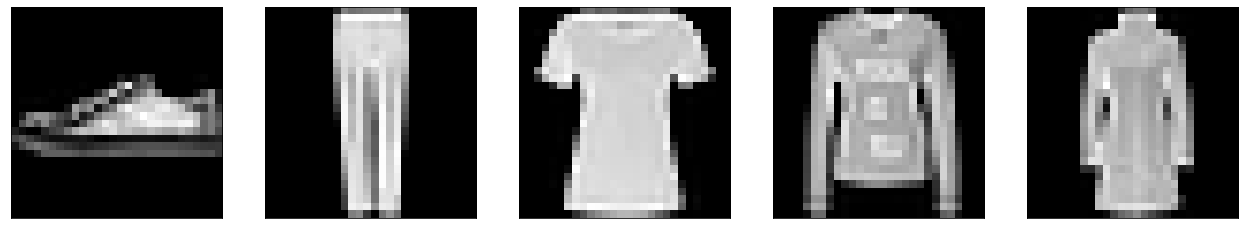

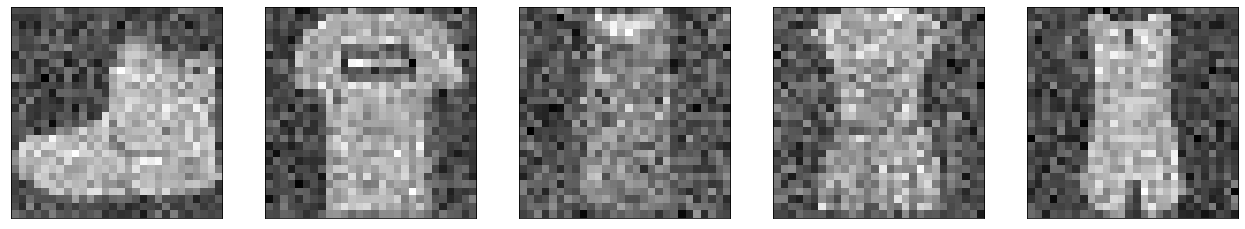

In [ ]:
# Визиализируем изображение
image_origin(X_train)
squares_predict(squares_prediction)

In [12]:
# Функция для расчета mse
def get_MSE(x1, x2):
  x1 = x1.flatten()
  x2 = x2.flatten()
  delta = x1 - x2
  return sum(delta ** 2) / len(delta)

In [ ]:
# Среднеквадратичные ошибки
err_squares = [get_MSE(X_train_squares[i], squares_prediction[i]/255) for i in range(len(squares_prediction))]
err_train = [get_MSE(X_train[i], train_prediction[i]/255) for i in range(len(train_prediction))]

In [ ]:
print(f'Средняя ошибка на fashion_mnist: {sum(err_train) / len(err_train):.5f}')
print(f'Средняя ошибка на испорченном изображении: {sum(err_squares) / len(err_squares):.5f}')

Средняя ошибка на fashion_mnist: 0.00564
Средняя ошибка на испорченном изображении: 0.04288


In [ ]:
bias = 0.05 # пороговое значение
mnist_fashion = [n < bias for n in err_train]
squares = [n < bias for n in err_squares]

print(f'Картинок распознано: {100*sum(mnist_fashion) / len(mnist_fashion)}'," %", sep="")
print(f'Испорченных распознано: {100*sum(squares) / len(squares)}', " %", sep="")

Картинок распознано: 99.96333333333334 %
Испорченных распознано: 94.49833333333333 %


VAR2

In [15]:
input_img = Input(shape=(28, 28, 1))

'''x = Conv2D(32, 3, activation='relu', padding='same')(input_img)
x = MaxPooling2D(2, padding='same')(x)
x = Conv2D(32, 3, activation='relu', padding='same')(x)

encoded = MaxPooling2D(2, padding='same')(x)

x = Conv2D(32, 3, activation='relu', padding='same')(encoded)

x = Conv2D(32, 3, activation='relu', padding='same')(x)
x = UpSampling2D(2)(x)
x = Conv2D(32, 3, activation='relu', padding='same')(x)
x = UpSampling2D(2)(x)

decoded = Conv2D(1, 3, activation='sigmoid', padding='same')(x)'''

x = Conv2D(32, (3, 3), padding='same', activation='relu')(input_img) # входные данные передаем на слой двумерной свёртки
x = BatchNormalization()(x) # затем пропускаем через слой нормализации данных 
x = Conv2D(32, (3, 3), padding='same', activation='relu')(x) # далее снова слой двумерной свёртки
x = BatchNormalization()(x) # и еще слой нормализации данных
x = MaxPooling2D()(x) # передаём на слой подвыборки, снижающий размерность поступивших на него данных
x = Conv2D(64, (3, 3), padding='same', activation='relu')(x) # передаем на слой двумерной свёртки
x = BatchNormalization()(x) # пропускаем через слой нормализации данных 
x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)  # далее снова слой двумерной свёртки
x = BatchNormalization()(x) # и еще слой нормализации данных

encoded = MaxPooling2D()(x) # передаём на слой подвыборки

# Изображение ужали до 7*7
x = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same', activation='relu')(encoded) # слой разжимает данные(с 7*7 на 14*14)
x = BatchNormalization()(x) # слой нормализации данных

x = Conv2D(64, (3, 3), padding='same', activation='relu')(x) # передаем на слой двумерной свёртки
x = BatchNormalization()(x) # слой нормализации данных
x = Conv2D(64, (3, 3), padding='same', activation='relu')(x) # ещё слой двумерной свёртки
x = BatchNormalization()(x) # слой нормализации данных
# Сжатие MaxPooling2D не применяем
x = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same', activation='relu')(x) # слой разжимает данные(с 14*14 на 28*28)
x = BatchNormalization()(x) # слой нормализации данных
x = Conv2D(32, (3, 3), padding='same', activation='relu')(x) # передаем на слой двумерной свёртки
x = BatchNormalization()(x) # слой нормализации данных
x = Conv2D(32, (3, 3), padding='same', activation='relu')(x) # ещё слой двумерной свёртки
x = BatchNormalization()(x) # слой нормализации данных
# Финальный слой двумерной свертки, выдающий итоговое изображение
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [16]:
autoencoder = Model(input_img, decoded)

In [17]:
autoencoder.compile(optimizer=Adam(lr=3e-4), loss='mse')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [18]:
history_autoencoder = autoencoder.fit(X_train_squares, X_train, epochs=100, batch_size=128, validation_data=(X_test_squares, X_test), verbose=1)

Epoch 1/100
469/469 [==============================] - 38s 17ms/step - loss: 0.0207 - val_loss: 0.0185
Epoch 2/100
469/469 [==============================] - 8s 16ms/step - loss: 0.0097 - val_loss: 0.0080
Epoch 3/100
469/469 [==============================] - 8s 16ms/step - loss: 0.0081 - val_loss: 0.0077
Epoch 4/100
469/469 [==============================] - 8s 16ms/step - loss: 0.0072 - val_loss: 0.0067
Epoch 5/100
469/469 [==============================] - 8s 16ms/step - loss: 0.0070 - val_loss: 0.0064
Epoch 6/100
469/469 [==============================] - 8s 16ms/step - loss: 0.0065 - val_loss: 0.0062
Epoch 7/100
469/469 [==============================] - 8s 16ms/step - loss: 0.0064 - val_loss: 0.0060
Epoch 8/100
469/469 [==============================] - 8s 16ms/step - loss: 0.0062 - val_loss: 0.0059
Epoch 9/100
469/469 [==============================] - 8s 16ms/step - loss: 0.0068 - val_loss: 0.0162
Epoch 10/100
469/469 [==============================] - 8s 16ms/step - loss: 0.00

In [19]:
# минимальная ошибка на обучающей и проверочной выборе
print(f'\nМинимальная ошибка на обучающей выборе: {min(history_autoencoder.history["loss"])} \
\nМинимальная ошибка на проверочной выборе: {min(history_autoencoder.history["val_loss"])}')


Минимальная ошибка на обучающей выборе: 0.004360953811556101 
Минимальная ошибка на проверочной выборе: 0.004557672422379255


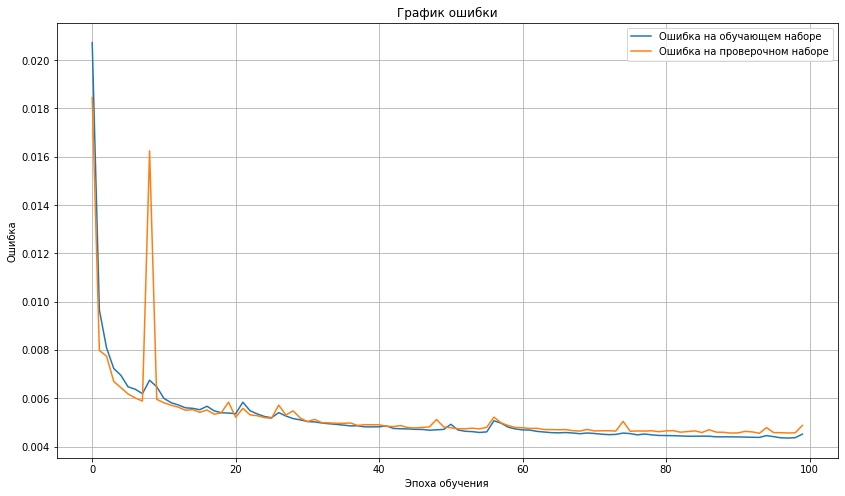

In [20]:
# Выводим графики ошибки
plt.figure(figsize=(14, 8))
plt.plot(history_autoencoder.history['loss'], label='Ошибка на обучающем наборе')
plt.plot(history_autoencoder.history['val_loss'], label='Ошибка на проверочном наборе')
plt.title('График ошибки')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.grid()
plt.legend()
plt.show()

In [21]:
# Результаты работы 
squares_prediction2 = autoencoder.predict(X_train_squares)
squares_prediction2 = (squares_prediction2 * 255).astype('uint8')

train_prediction2 = autoencoder.predict(X_train)
train_prediction2 = (train_prediction2 * 255).astype('uint8')

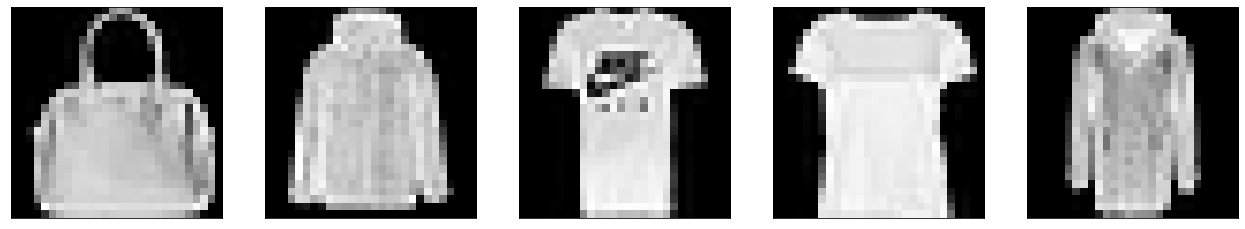

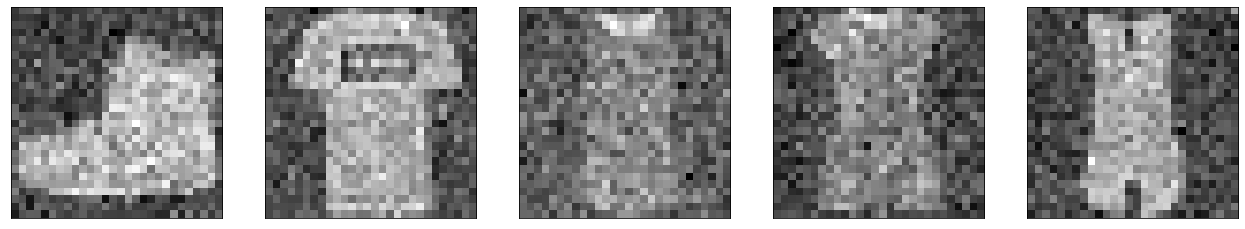

In [22]:
# Визиализируем изображение
image_origin(X_train)
squares_predict(squares_prediction2)

In [23]:
# Среднеквадратичные ошибки
err_squares2 = [get_MSE(X_train_squares[i], squares_prediction2[i]/255) for i in range(len(squares_prediction2))]
err_train2 = [get_MSE(X_train[i], train_prediction2[i]/255) for i in range(len(train_prediction2))]

In [24]:
print(f'Средняя ошибка на fashion_mnist: {sum(err_train2) / len(err_train2):.5f}')
print(f'Средняя ошибка на испорченном изображении: {sum(err_squares2) / len(err_squares2):.5f}')
# тоже, проще и меньше писать
print(f'Средняя ошибка на fashion_mnist: {np.mean(err_train2):.5f}')
print(f'Средняя ошибка на испорченном изображении: {np.mean(err_squares2):.5f}')

Средняя ошибка на fashion_mnist: 0.00366
Средняя ошибка на испорченном изображении: 0.03889
Средняя ошибка на fashion_mnist: 0.00366
Средняя ошибка на испорченном изображении: 0.03889


In [25]:
bias = 0.05 # пороговое значение
mnist_fashion2 = [n < bias for n in err_train2]
squares2 = [n < bias for n in err_squares2]

print(f'Картинок распознано: {(sum(mnist_fashion2) / len(mnist_fashion2)) * 100}'," %", sep="")
print(f'Испорченных распознано: {(sum(squares2) / len(squares2)) * 100}', " %", sep="")

Картинок распознано: 100.0 %
Испорченных распознано: 99.89333333333333 %
